Mounting Drive

Importing Libraries

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from tqdm.auto import tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

Extracting Dataset

In [13]:
data=pd.read_csv('../data/Loan_Data.csv')
data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
data.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


Data Interpretation

In [15]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Missing values

In [16]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data.shape

(614, 13)

In [18]:
data.dropna(inplace = True)

In [19]:
data.shape

(480, 13)

In [20]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [21]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
le=LabelEncoder()
text_column=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for column in tqdm(text_column):
  data[column]=le.fit_transform(data[column])

  0%|          | 0/7 [00:00<?, ?it/s]

In [23]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [24]:
data = data.drop(['Loan_ID'],axis=1)

In [25]:
data = data.astype(np.float64)

In [26]:
data.dtypes

Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [27]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0


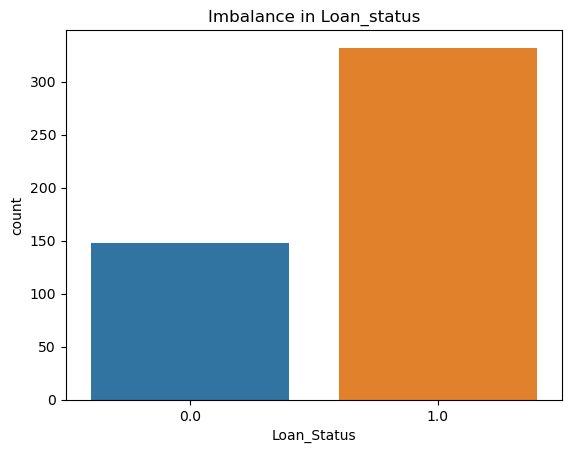

In [28]:
sns.countplot(x=data['Loan_Status'],data=data)
plt.title("Imbalance in Loan_status")
plt.show()

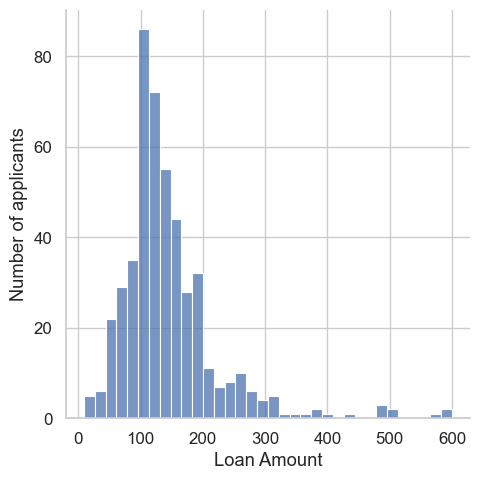

In [29]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.displot(data=data, x=data['LoanAmount']).set(xlabel='Loan Amount', ylabel='Number of applicants')
plt.show()

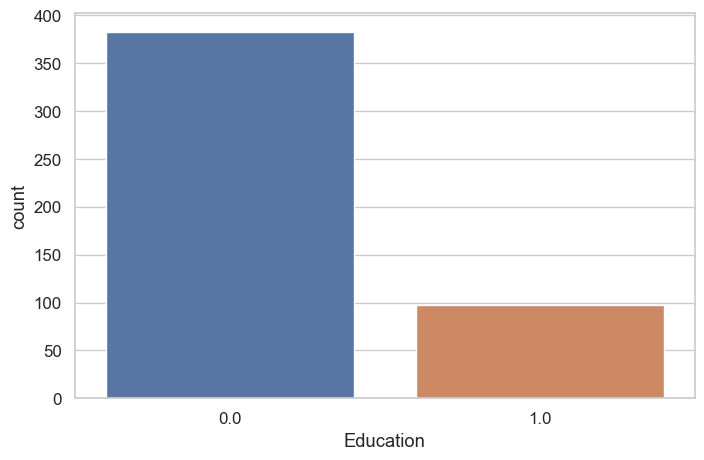

In [30]:
sns.countplot(x=data['Education'])
plt.show()

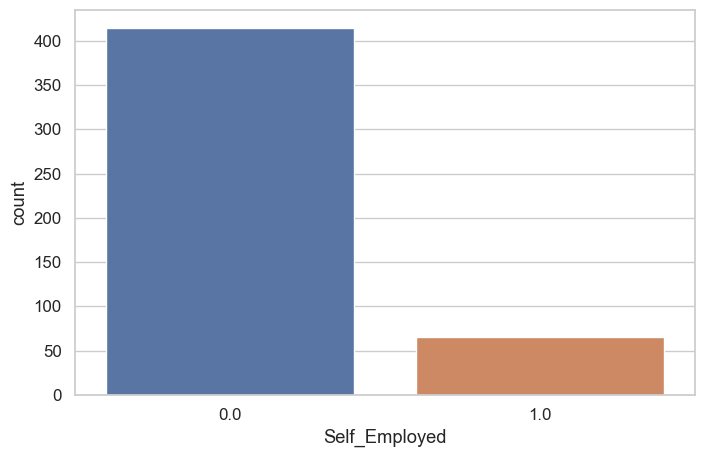

In [31]:
sns.countplot(x=data['Self_Employed'])
plt.show()

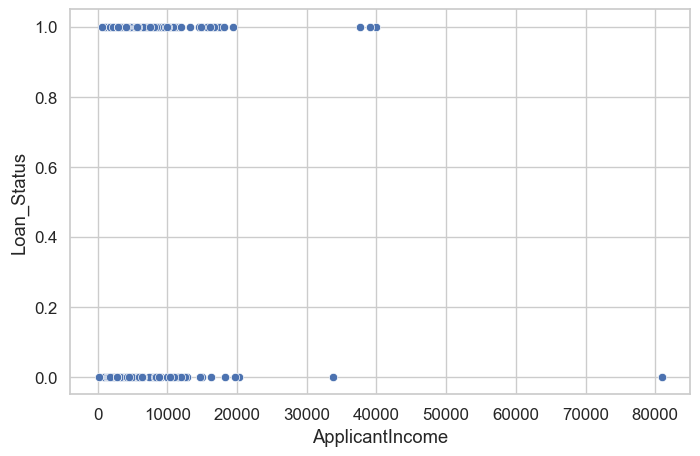

In [32]:
sns.scatterplot(x=data['ApplicantIncome'], y=data['Loan_Status'],color='b')
plt.show()

In [33]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0,1.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0,1.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0,1.0
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0,1.0


In [34]:
data.shape

(480, 12)

In [35]:
X=data.drop(['Loan_Status'],axis='columns')

In [36]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0
2,1.0,1.0,0.0,0.0,1.0,3000.0,0.0,66.0,360.0,1.0,2.0
3,1.0,1.0,0.0,1.0,0.0,2583.0,2358.0,120.0,360.0,1.0,2.0
4,1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0
5,1.0,1.0,2.0,0.0,1.0,5417.0,4196.0,267.0,360.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900.0,0.0,71.0,360.0,1.0,0.0
610,1.0,1.0,3.0,0.0,0.0,4106.0,0.0,40.0,180.0,1.0,0.0
611,1.0,1.0,1.0,0.0,0.0,8072.0,240.0,253.0,360.0,1.0,2.0
612,1.0,1.0,2.0,0.0,0.0,7583.0,0.0,187.0,360.0,1.0,2.0


In [37]:
Y=data['Loan_Status']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 41)

In [39]:
model=GaussianNB()

In [40]:
model.fit(x_train.values,y_train.values)
y_pred=model.predict(x_test.values)
print("Accuracy score of Gaussian NB is  : ",model.score(x_test,y_test))

Accuracy score of Gaussian NB is  :  0.85


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


In [55]:
model1=LogisticRegression(max_iter=75)
model1.fit(x_train,y_train)
y_pred1=model1.predict(x_test)
print("Accuracy of Logistic Regression is : ",model1.score(x_test,y_test))

Accuracy of Logistic Regression is :  0.85


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
model2=RandomForestClassifier(n_estimators= 10, criterion="entropy")
model2.fit(x_train,y_train)
y_pred2=model2.predict(x_test)
print("Accuracy score of Random Forest is  : ",model2.score(x_test,y_test))

Accuracy score of Random Forest is  :  0.8166666666666667


In [43]:
model.predict([[1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0]])

array([1.])

In [44]:
print("Loan Status : ",int(model.predict([[1.0,1.0,1.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0,0.0]])))

Loan Status :  1


In [45]:
model1.predict([[1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])

In [46]:
np.count_nonzero(np.array(y_pred)==1.0)

92

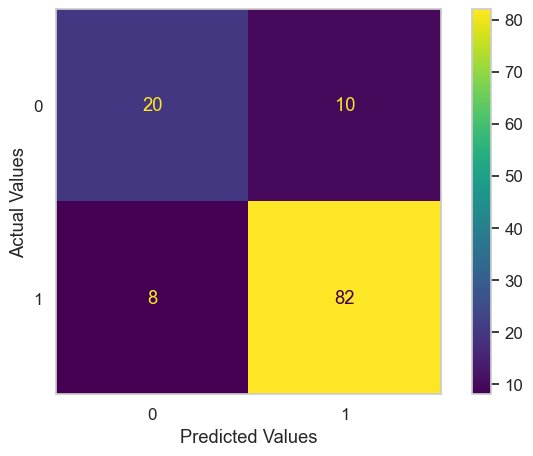

0 : Loan Not Approved 
1 : Loan Apprvoed


In [47]:
cm=confusion_matrix(y_test,y_pred)
cm=metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [0, 1])
cm.plot()
plt.grid(False)
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()
print("0 : Loan Not Approved \n1 : Loan Apprvoed")

In [48]:
cm=confusion_matrix(y_test,y_pred1)
print(cm)

[[19 11]
 [ 6 84]]


In [49]:
model2.predict([[1.0,0.0,0.0,0.0,0.0,6000.0,0.0,141.0,360.0,1.0,2.0]])

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1.])

In [50]:
cm=confusion_matrix(y_test,y_pred2)
print(cm)

[[20 10]
 [12 78]]


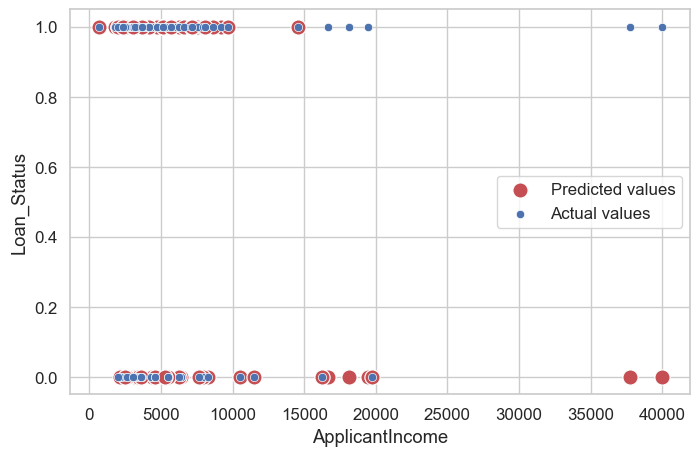

In [51]:
sns.scatterplot(x=x_test['ApplicantIncome'],y=y_pred,color='r',s=120,)
sns.scatterplot(x=x_test['ApplicantIncome'],y=y_test,color='b')
plt.legend(['Predicted values', 'Actual values'])
plt.show()

In [52]:
import pickle
pickle.dump(model,open('../bin/model.pkl','wb'))